In [269]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Hides unnecessary warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [270]:
# Load the dataset
dataset = pd.read_csv("HousingData.csv")

In [271]:
# Show first few rows
print("\n--- Dataset Head ---\n")
print(dataset.head())


--- Dataset Head ---

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


# Preparing The Dataset

In [272]:
dataset.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [273]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [274]:
# Check missing values (column-wise %)
print("\n--- Missing Values (% by Column) ---")
print(dataset.isnull().sum() / dataset.shape[0] * 100)



--- Missing Values (% by Column) ---
CRIM       3.952569
ZN         3.952569
INDUS      3.952569
CHAS       3.952569
NOX        0.000000
RM         0.000000
AGE        3.952569
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      3.952569
MEDV       0.000000
dtype: float64


In [275]:
# Check missing values in whole dataset (%)
print("\n--- Total Missing Values (% in Entire Dataset) ---")
print((dataset.isnull().sum().sum() / (dataset.shape[0] * dataset.shape[1])) * 100)



--- Total Missing Values (% in Entire Dataset) ---
1.693958215697346


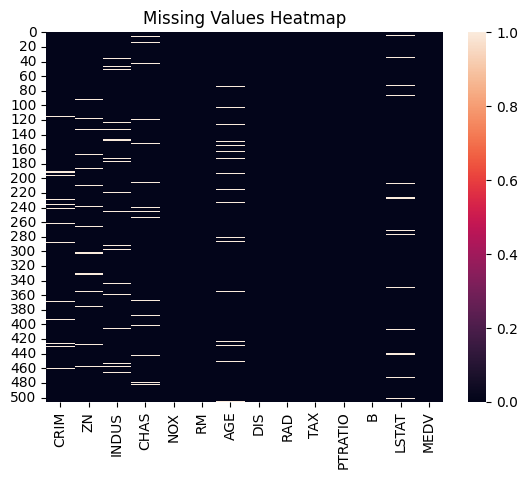

In [276]:
# Visualize missing values using heatmap
sns.heatmap(dataset.isnull())
plt.title("Missing Values Heatmap")
plt.show()

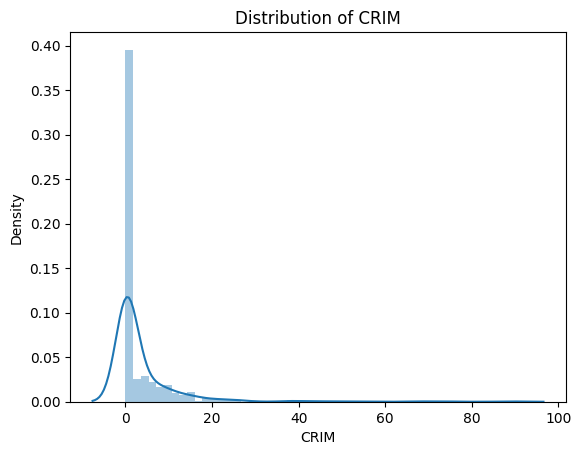

In [277]:
 sns.distplot(dataset["CRIM"])
plt.title("Distribution of CRIM")
plt.xlabel("CRIM")
plt.show()

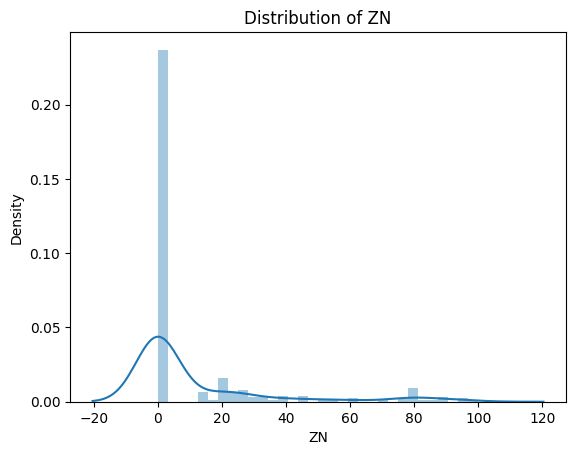

In [278]:
sns.distplot(dataset["ZN"])
plt.title("Distribution of ZN")
plt.xlabel("ZN")
plt.show()

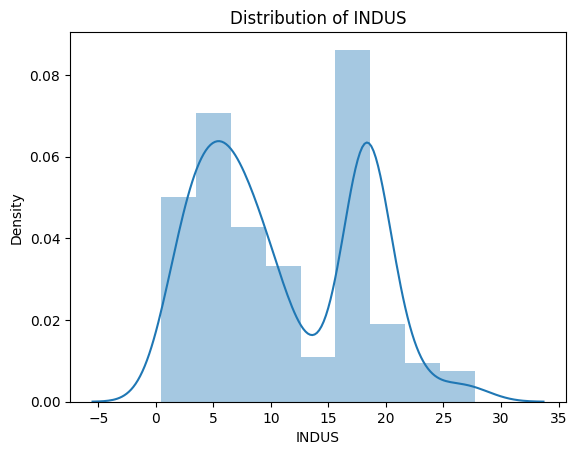

In [279]:
sns.distplot(dataset["INDUS"])
plt.title("Distribution of INDUS")
plt.xlabel("INDUS")
plt.show()

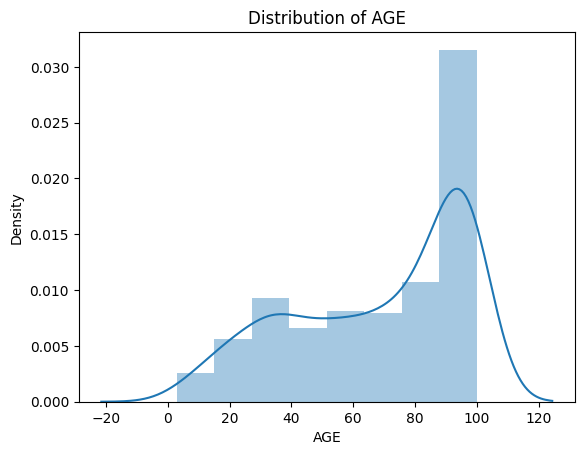

In [280]:
sns.distplot(dataset["AGE"])
plt.title("Distribution of AGE")
plt.xlabel("AGE")
plt.show()

In [281]:
# Count values of CHAS (categorical column)
print("\n--- Value Counts of CHAS ---")
print(dataset["CHAS"].value_counts())


--- Value Counts of CHAS ---
CHAS
0.0    452
1.0     34
Name: count, dtype: int64


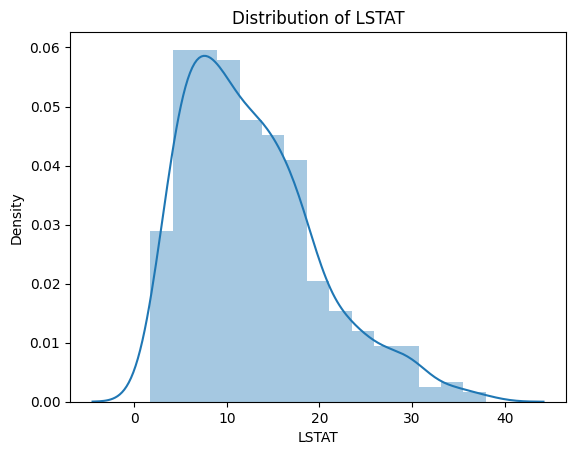

In [282]:
sns.distplot(dataset["LSTAT"])
plt.title("Distribution of LSTAT")
plt.xlabel("LSTAT")
plt.show()

In [283]:
# Handle missing values using SimpleImputer
from sklearn.impute import SimpleImputer

# Median imputation
median_cols = ["CRIM", "ZN", "INDUS", "AGE"]
median_imputer = SimpleImputer(strategy="median")
dataset[median_cols] = median_imputer.fit_transform(dataset[median_cols])

# Mean imputation
mean_cols = ["LSTAT"]
mean_imputer = SimpleImputer(strategy="mean")
dataset[mean_cols] = mean_imputer.fit_transform(dataset[mean_cols])

# Mode imputation
mode_cols = ["CHAS"]
mode_imputer = SimpleImputer(strategy="most_frequent")
dataset[mode_cols] = mode_imputer.fit_transform(dataset[mode_cols])

# Verify missing values are filled
print("\n--- Missing Values After Imputation ---")
print(dataset.isnull().sum().sum())


--- Missing Values After Imputation ---
0


In [284]:
# Show summary statistics
print("\n--- Dataset Description ---")
print(dataset.describe())


--- Dataset Description ---
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.479140   10.768775   11.028893    0.067194    0.554695    6.284634   
std      8.570832   23.025124    6.704679    0.250605    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.083235    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      2.808720    0.000000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.845850    3.795043    9.549407  408.237154   18.455534  356.674032  

In [285]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, target_column, categorical_column):
    features = df.drop([target_column, categorical_column], axis=1).columns
    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# Remove outliers from dataset
dataset = remove_outliers_iqr(dataset, target_column="MEDV", categorical_column="CHAS")

 ### Exploratory data analysis

In [286]:
# Correlation matrix
print("\n--- Correlation Matrix (in %) ---\n")
dataset.corr() * 100


--- Correlation Matrix (in %) ---



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,100.000000,-16.996585,22.251616,-4.582562,49.494159,-3.971508,38.400302,-27.732697,10.741532,21.701353,4.701142,-16.197120,19.494950,-6.632739
ZN,-16.996585,100.000000,-35.073540,5.998732,-38.318733,34.463921,-31.542793,41.677490,18.470961,-9.403334,-36.727087,-5.326187,-30.372325,36.814225
INDUS,22.251616,-35.073540,100.000000,0.024199,47.352989,-31.227381,33.862345,-43.455828,-15.080581,31.342179,33.495700,-6.621252,41.718555,-37.345956
CHAS,-4.582562,5.998732,0.024199,100.000000,-3.560764,8.445154,5.562991,-7.292149,10.746997,-12.166170,-11.408887,-2.316292,9.241617,12.995690
NOX,49.494159,-38.318733,47.352989,-3.560764,100.000000,-9.086042,65.563448,-74.501693,-5.096597,25.830401,8.188783,6.175326,37.162480,-15.390830
RM,-3.971508,34.463921,-31.227381,8.445154,-9.086042,100.000000,-5.237200,1.957079,4.980577,-15.427139,-40.000448,-7.612833,-62.777467,79.994992
AGE,38.400302,-31.542793,33.862345,5.562991,65.563448,-5.237200,100.000000,-57.834083,-4.431950,16.877016,12.996191,3.369850,48.570626,-22.102341
DIS,-27.732697,41.677490,-43.455828,-7.292149,-74.501693,1.957079,-57.834083,100.000000,11.215283,-18.501412,-6.340200,-12.044635,-23.824023,0.076512
RAD,10.741532,18.470961,-15.080581,10.746997,-5.096597,4.980577,-4.431950,11.215283,100.000000,26.437953,-11.998278,-18.379521,-3.466843,8.696785
TAX,21.701353,-9.403334,31.342179,-12.166170,25.830401,-15.427139,16.877016,-18.501412,26.437953,100.000000,18.171828,-7.669514,25.372286,-29.272375


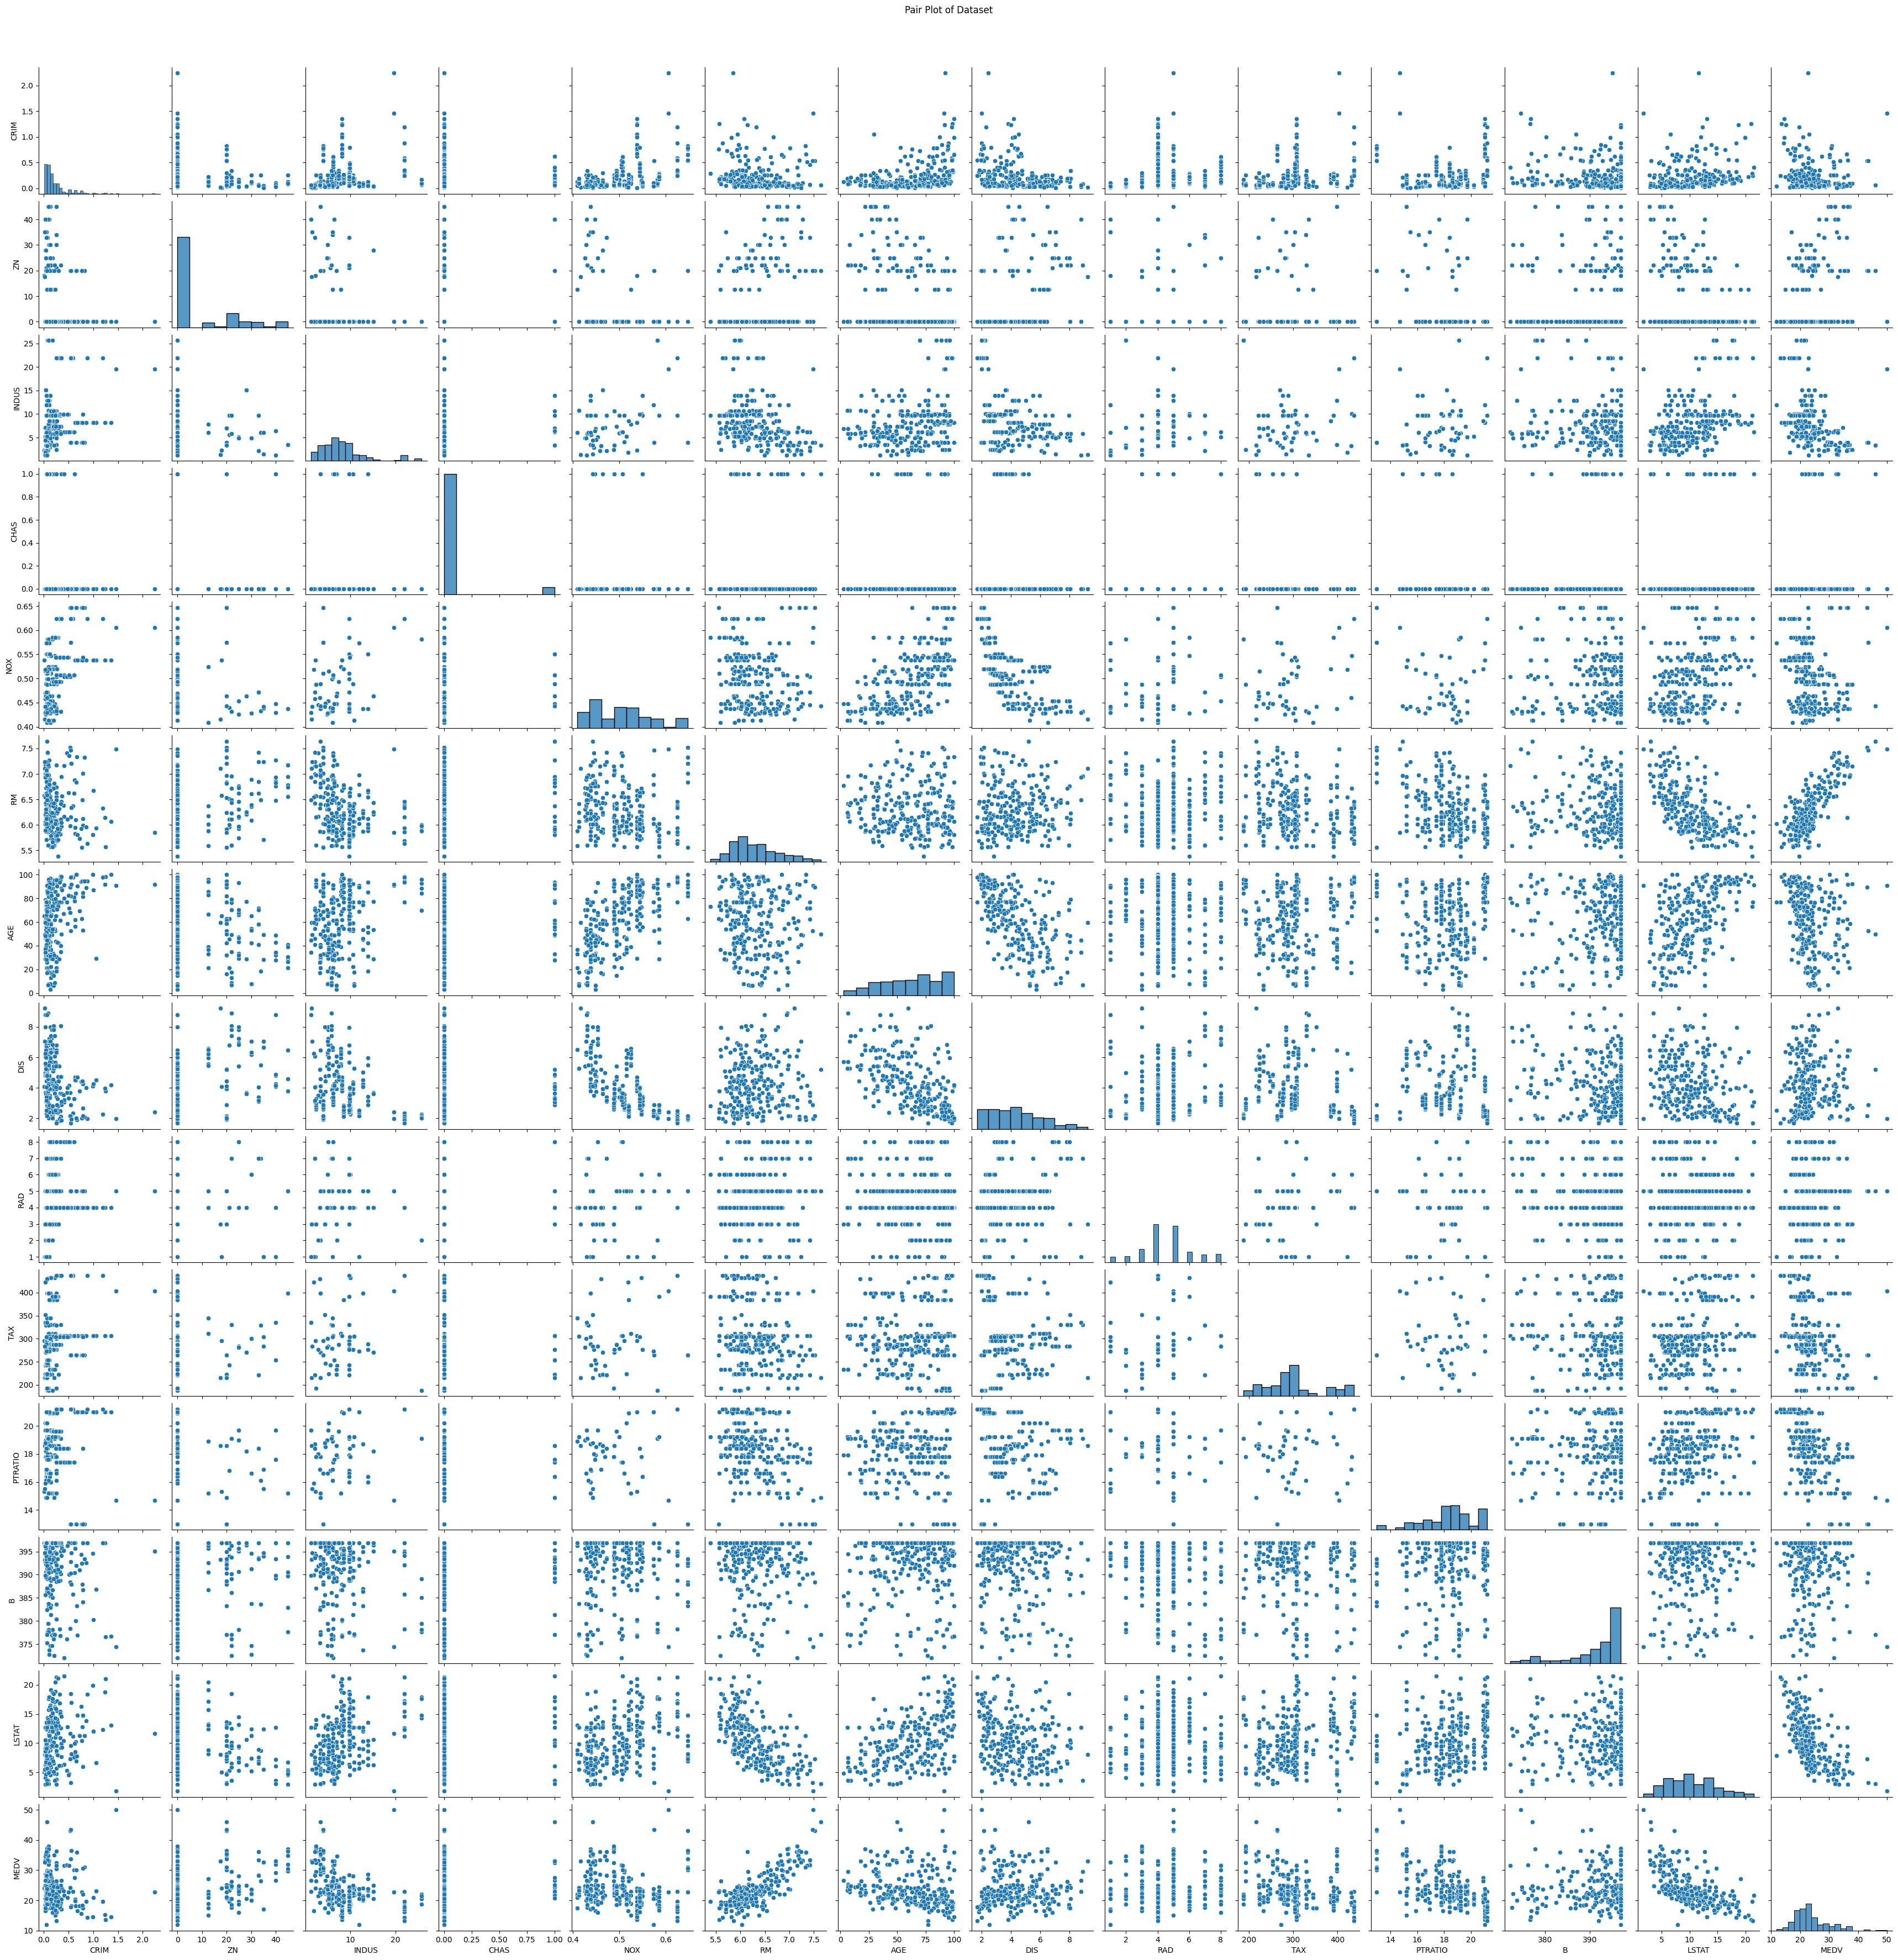

In [287]:
# Pair plot to show relation between features
sns.pairplot(data=dataset)
plt.suptitle("Pair Plot of Dataset", y=1.02)
plt.show()

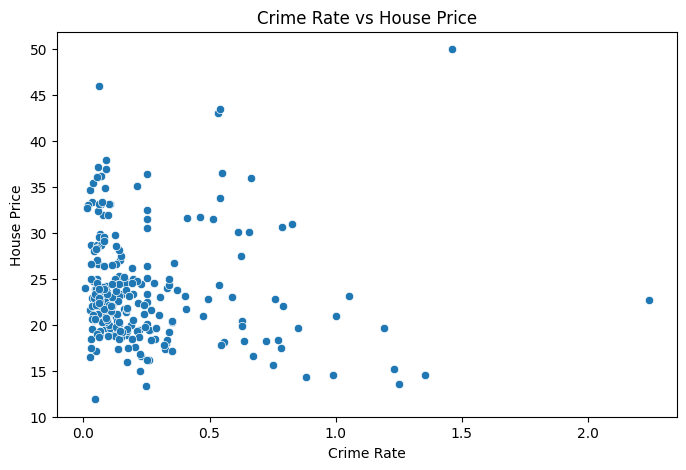

In [288]:
# Scatter plots
plt.figure(figsize=(8,5))
plt.xlabel("Crime Rate")
plt.ylabel("House Price")
sns.scatterplot(x=dataset["CRIM"], y=dataset["MEDV"])
plt.title("Crime Rate vs House Price")
plt.show()

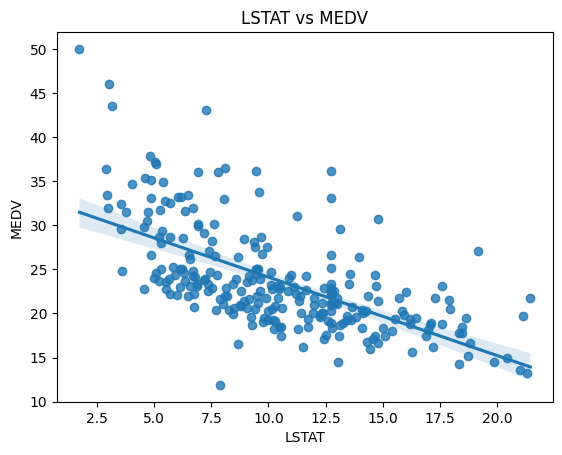

In [289]:
sns.regplot(x="LSTAT", y="MEDV", data=dataset)
plt.title("LSTAT vs MEDV")
plt.show()

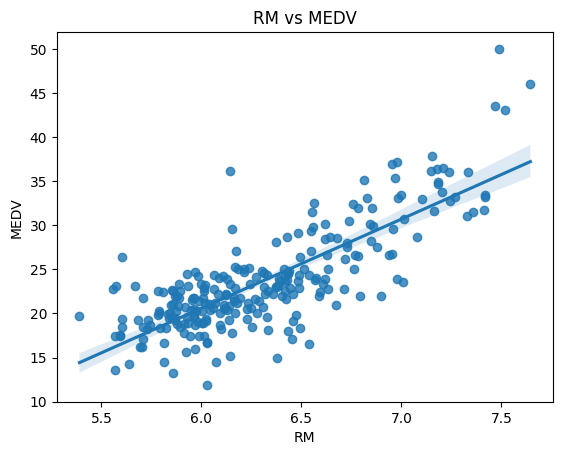

In [290]:
sns.regplot(x="RM", y="MEDV", data=dataset)
plt.title("RM vs MEDV")
plt.show()

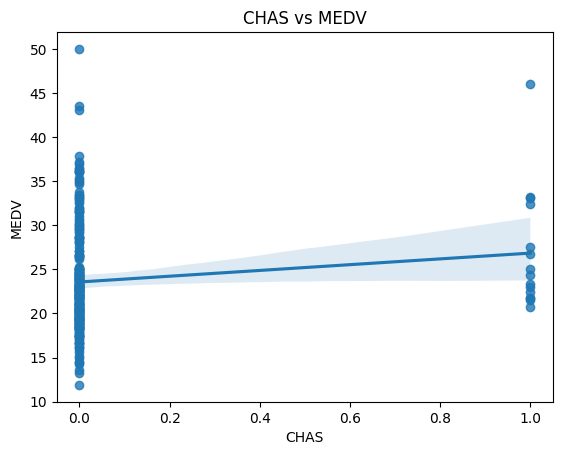

In [291]:
sns.regplot(x="CHAS", y="MEDV", data=dataset)
plt.title("CHAS vs MEDV")
plt.show()

In [292]:
# Feature and target split
x = dataset.iloc[:, :-1]
y = dataset["MEDV"]


In [293]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,12.715432
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.080000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.640000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.480000


In [294]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 254, dtype: float64

In [295]:
# Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [296]:
print("\n--- Train/Test Shape ---")
print("X_train:", x_train.shape, "X_test:", x_test.shape)
print("Y_train:", y_train.shape, "Y_test:", y_test.shape)


--- Train/Test Shape ---
X_train: (203, 13) X_test: (51, 13)
Y_train: (203,) Y_test: (51,)


In [297]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)  # Note: use transform here, not fit_transform


In [298]:
x_test,x_train

(array([[-0.52301505,  2.44339306, -0.38262639, -0.27216553, -0.8494999 ,
          0.36260639, -1.10929619, -0.10858221, -0.34803133, -0.79267232,
         -0.39616925,  0.82617658, -0.74419952],
        [-0.49273575,  0.35341501, -0.10559498, -0.27216553,  0.38059755,
         -0.63977744,  0.21657733,  0.69409872,  0.26631963,  0.0454901 ,
         -1.6651611 ,  0.63008354,  0.48396681],
        [-0.56279445, -0.59657502, -1.05053774, -0.27216553, -0.88145048,
          2.35457764,  0.05900975, -0.47318541, -1.57673324, -0.46917103,
         -0.18467061,  0.82617658, -0.97858241],
        [-0.63139433,  1.91139865, -1.1852585 , -0.27216553, -0.45011761,
          1.14531886,  0.35877246, -0.64980686,  1.49502154, -1.26321965,
          0.02682803,  0.82617658, -0.66450934],
        [-0.48031803, -0.59657502,  0.23974555, -0.27216553,  0.15694347,
          0.2218461 ,  0.60857471, -0.95297406,  0.26631963, -0.17507895,
         -0.92491586,  0.61499947, -0.31059118],
        [-0.399

In [299]:
x_train[0]

array([-0.02491869, -0.59657502, -0.28775262, -0.27216553, -0.8335246 ,
       -1.51419737,  0.03979419,  0.99206618, -0.96238228, -1.101469  ,
       -0.23754527,  0.82617658,  1.36759029])

In [300]:
# Train a linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [301]:
# Model parameters
print("\n--- Model Coefficients ---")
print(lr.coef_)
print("\n Intercept:", lr.intercept_)


--- Model Coefficients ---
[ 0.40417403  0.17507985 -0.26037451  0.1796839  -0.33037047  3.8703209
 -1.07018824 -1.26042584  0.16655388 -0.77476746 -1.40682078 -0.08086792
 -0.21188986]

 Intercept: 23.71822660098522


In [302]:
# Show the model parameters used in Linear Regression
print("\n--- Model Parameters (get_params) ---")
print(lr.get_params())



--- Model Parameters (get_params) ---
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [303]:
# Make predictions
predictions = lr.predict(x_test)

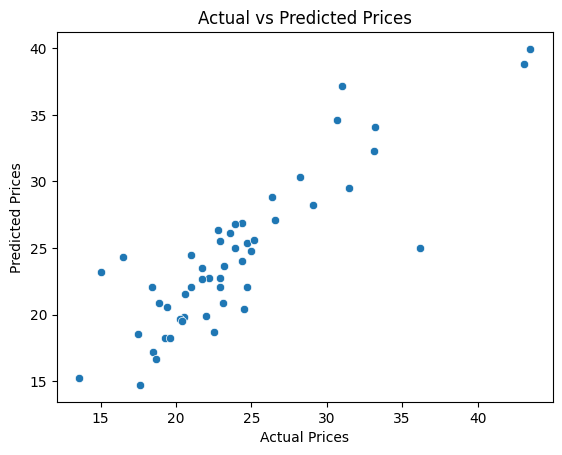

In [304]:
# Scatter plot: actual vs predicted
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


In [305]:
# Error analysis
error = y_test - predictions
print("\n--- Prediction Error ---")
print(error.head()) 


--- Prediction Error ---
278    0.902196
6      0.850784
99    -0.849607
307   -2.137877
173   -2.562219
Name: MEDV, dtype: float64


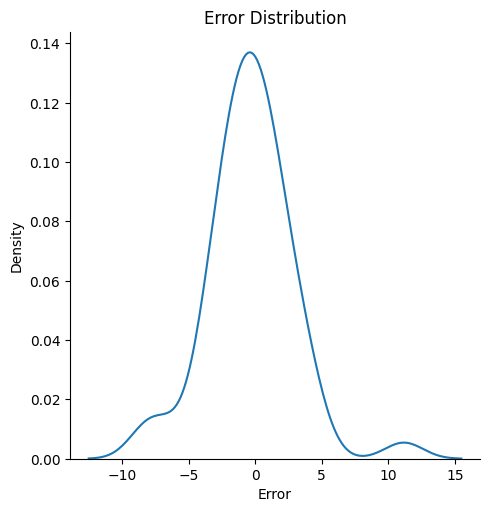

In [306]:
sns.displot(error, kind="kde")
plt.title("Error Distribution")
plt.xlabel("Error")
plt.show()

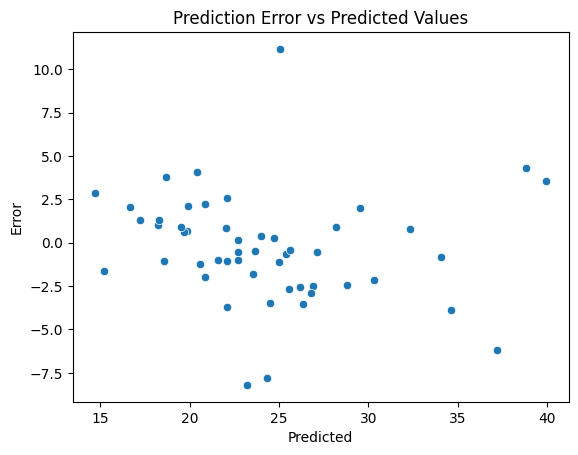

In [307]:
sns.scatterplot(x=predictions, y=error)
plt.xlabel("Predicted")
plt.ylabel("Error")
plt.title("Prediction Error vs Predicted Values")
plt.show()

In [308]:
# Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("\n--- Performance Metrics ---")
print("MAE:", mean_absolute_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))


--- Performance Metrics ---
MAE: 2.298987029664928
MSE: 9.918654582631893
RMSE: 3.1493895571414936


In [309]:
score = r2_score(y_test, predictions)
print("R2 Score (%):", score * 100)

R2 Score (%): 73.00264300483329


In [310]:
# Adjusted R2
n = len(y_test)
p = x.shape[1]
adjusted_r2 = 1 - ((1 - score) * (n - 1) / (n - p - 1))
print("Adjusted R2 Score (%):", adjusted_r2 * 100)

Adjusted R2 Score (%): 63.517085141666605


In [311]:
# Sample prediction using input
sample_input = [[0.1, 25.0, 5.0, 0, 0.45, 6.2, 45.0, 4.5, 4, 300.0, 17.0, 390.5, 9.5]]
sample_input = pd.DataFrame(sample_input, columns=x.columns)
sample_input_scaled = ss.transform(sample_input)
print("\n--- Sample Scaled Input ---")
print(sample_input_scaled)


--- Sample Scaled Input ---
[[-0.45107057  1.30340503 -0.65017043 -0.27216553 -0.80157402 -0.23882391
  -0.61353479  0.09471615 -0.34803133 -0.11626054 -0.71341722 -0.1392045
  -0.20277505]]


In [312]:
print("\n--- Prediction on Sample Input ---")
print(lr.predict(sample_input))


--- Prediction on Sample Input ---
[-292.42115086]


In [313]:
# Manual prediction using already scaled input
print("\n--- Prediction on Manual Scaled Input ---")
print(lr.predict([[1.31113389, -0.47914112, 1.08544651, -0.27288841, 0.48925206,
                   -1.42806858, 1.04842183, -0.80217296, 1.70689143, 1.57843444,
                   0.84534281, -0.07433689, 1.78567409]]))



--- Prediction on Manual Scaled Input ---
[15.53273052]


In [314]:
# Save model and scaler using pickle
import pickle as p
p.dump(lr, open("lr_model.pkl", "wb"))
p.dump(ss, open("scaling.pkl", "wb"))

In [315]:
# Load saved model
pkl_lr = p.load(open("lr_model.pkl", "rb"))

# Load saved scaler
pkl_scaler = p.load(open("scaling.pkl", "rb"))

In [316]:
# Sample input (unscaled)
sample_input = [[0.1, 25.0, 5.0, 0, 0.45, 6.2, 45.0, 4.5, 4, 300.0, 17.0, 390.5, 9.5]]

# Convert input to DataFrame with correct column names
sample_input_df = pd.DataFrame(sample_input, columns=x.columns)

# Scale the sample input using loaded scaler
scaled_input = pkl_scaler.transform(sample_input_df)


In [317]:
# Predict using loaded model
print("\n--- Prediction Using Loaded Model and Scaler (Unscaled Input) ---")
print(pkl_lr.predict(scaled_input))



--- Prediction Using Loaded Model and Scaler (Unscaled Input) ---
[24.85218809]


In [318]:
# Direct prediction on already scaled values (optional)
print("\n--- Prediction Using Loaded Model on Already Scaled Input ---")
print(pkl_lr.predict([[1.31113389, -0.47914112,  1.08544651, -0.27288841,  0.48925206,
                       -1.42806858,  1.04842183, -0.80217296,  1.70689143,  1.57843444,
                        0.84534281, -0.07433689,  1.78567409]]))


--- Prediction Using Loaded Model on Already Scaled Input ---
[15.53273052]
